In [3]:
import pandas as pd
import numpy as np
import seaborn as sns

# To partition the data
from sklearn.model_selection import train_test_split

# Importing library for Logistic Regression
from sklearn.linear_model import LogisticRegression

# Importing performance metrics: accuracy score and confusion matrix
from sklearn.metrics import accuracy_score, confusion_matrix

In [4]:
data_income = pd.read_csv("income.csv")
data = data_income.copy()

# EXPLANATORY DATA ANALYSIS:
1. Getting to know the data
2. Data Preprocessing (Missing values)
3. Cross tables and data visualization

In [11]:
np.where(data['capitalgain'] > 0)

(array([   42,    47,    78, ..., 31958, 31969, 31973], dtype=int64),)

### 1.Getting to know the data

In [4]:
print(data.info())
print("\n")
print(f"Missing Values:\n{data.isnull().sum()}")

summary_num = data.describe()
print("\n")
print(f"Numerical Summary:\n{summary_num}")

summary_cate = data.describe(include = "O")
print("\n")
print(f"Categorical Summary:\n{summary_cate}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31978 entries, 0 to 31977
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            31978 non-null  int64 
 1   JobType        31978 non-null  object
 2   EdType         31978 non-null  object
 3   maritalstatus  31978 non-null  object
 4   occupation     31978 non-null  object
 5   relationship   31978 non-null  object
 6   race           31978 non-null  object
 7   gender         31978 non-null  object
 8   capitalgain    31978 non-null  int64 
 9   capitalloss    31978 non-null  int64 
 10  hoursperweek   31978 non-null  int64 
 11  nativecountry  31978 non-null  object
 12  SalStat        31978 non-null  object
dtypes: int64(4), object(9)
memory usage: 3.2+ MB
None


Missing Values:
age              0
JobType          0
EdType           0
maritalstatus    0
occupation       0
relationship     0
race             0
gender           0
capitalgain      0
ca

In [5]:
# TO GET FREQUENCY OF EACH CATEGORY UNDER EACH CATEGORICAL VARIABLE
print(f"JobType:\n{data['JobType'].value_counts()}")
print("\n")
print(f"Occupation:\n{data['occupation'].value_counts()}")
print("\n")
print(f"Education type:\n{data['EdType'].value_counts()}")
print("\n")
print(f"Marital Status:\n{data['maritalstatus'].value_counts()}")
print("\n")
print(f"Relationship:\n{data['relationship'].value_counts()}")
print("\n")
print(f"race:\n{data['race'].value_counts()}")
print("\n")
print(f"Gender:\n{data['gender'].value_counts()}")
print("\n")
print(f"Native Country:\n{data['nativecountry'].value_counts()}")
print("\n")
print(f"Salary status:\n{data['SalStat'].value_counts()}")
print("\n")

JobType:
 Private             22286
 Self-emp-not-inc     2499
 Local-gov            2067
 ?                    1809
 State-gov            1279
 Self-emp-inc         1074
 Federal-gov           943
 Without-pay            14
 Never-worked            7
Name: JobType, dtype: int64


Occupation:
 Prof-specialty       4038
 Craft-repair         4030
 Exec-managerial      3992
 Adm-clerical         3721
 Sales                3584
 Other-service        3212
 Machine-op-inspct    1966
 ?                    1816
 Transport-moving     1572
 Handlers-cleaners    1350
 Farming-fishing       989
 Tech-support          912
 Protective-serv       644
 Priv-house-serv       143
 Armed-Forces            9
Name: occupation, dtype: int64


Education type:
 HS-grad         10368
 Some-college     7187
 Bachelors        5210
 Masters          1674
 Assoc-voc        1366
 11th             1167
 Assoc-acdm       1055
 10th              921
 7th-8th           627
 Prof-school       559
 9th               506

IT IS OBSERVED THAT THERE IS AN ENTRY '?' IN JOBTYPE AND OCCUPATION.... WHICH NEEDS TO BE CONSIDERED AS NULL

In [15]:
print(np.unique(data["JobType"]))
print(np.unique(data["occupation"]))

[' ?' ' Federal-gov' ' Local-gov' ' Never-worked' ' Private'
 ' Self-emp-inc' ' Self-emp-not-inc' ' State-gov' ' Without-pay']
[' ?' ' Adm-clerical' ' Armed-Forces' ' Craft-repair' ' Exec-managerial'
 ' Farming-fishing' ' Handlers-cleaners' ' Machine-op-inspct'
 ' Other-service' ' Priv-house-serv' ' Prof-specialty' ' Protective-serv'
 ' Sales' ' Tech-support' ' Transport-moving']


Also, there is an unrequired empty space " " at the start of each of entry

Going back and reading the data by including 'na_values = [" ?"] to be read as NaN values'

In [7]:
data = pd.read_csv("income.csv", na_values = [" ?"])

### Data Pre Processing 

In [8]:
data.isna().sum()

age                 0
JobType          1809
EdType              0
maritalstatus       0
occupation       1816
relationship        0
race                0
gender              0
capitalgain         0
capitalloss         0
hoursperweek        0
nativecountry       0
SalStat             0
dtype: int64

In [17]:
missing = data[data.isnull().any(axis = 1)]
print(missing)
print(missing.shape)

Empty DataFrame
Columns: [age, JobType, EdType, maritalstatus, occupation, relationship, race, gender, capitalgain, capitalloss, hoursperweek, nativecountry, SalStat]
Index: []
(0, 13)


#### Points to Note:
1. Missing values in job type  = 1809
2. Missing values in occupation  = 1816
3. there are 1809 rows where oocupation and job type both have missing values
4. (1816 - 1809) = 7 .... you still have occupation unfilled for these 7 rows. Because, jobtype is 'Never worked'


If the missing data is at random, we have to model the mechanism to study the reason and fill the missing value with a suitable alternative.... which is very complex in this case

So, here we will remove all the rows having missing data and consider the rows having all the data only

In [19]:
data2 = data.dropna(axis = 0)

Checking the relationship between independent (numerical) variables ... (correlation)

In [12]:
correlation = data2.corr()
print(correlation)

                   age  capitalgain  capitalloss  hoursperweek
age           1.000000     0.080154     0.060165      0.101599
capitalgain   0.080154     1.000000    -0.032229      0.080432
capitalloss   0.060165    -0.032229     1.000000      0.052417
hoursperweek  0.101599     0.080432     0.052417      1.000000


None of the correlation values are close to 1... most of the values are closer to 0

so none of the variables are correlated

### Cross tables and data visualization

looking at categorical variables to look at their interrelationship

In [13]:
# Extracting column names
data2.columns

Index(['age', 'JobType', 'EdType', 'maritalstatus', 'occupation',
       'relationship', 'race', 'gender', 'capitalgain', 'capitalloss',
       'hoursperweek', 'nativecountry', 'SalStat'],
      dtype='object')

###### Gender Proportion table

In [15]:
gender = pd.crosstab(index = data2['gender'], 
                     columns = 'count', 
                     normalize = True)
print(gender)

col_0       count
gender           
 Female  0.324315
 Male    0.675685


###### Gender vs Salary status table (2 way table)... conditional probability


In [21]:
gender_salstat = pd.crosstab(index = data2['gender'],
                            columns = data2['SalStat'],
                            dropna = True,
                            margins = True,
                            normalize = 'index')
print(gender_salstat)

SalStat   greater than 50,000   less than or equal to 50,000
gender                                                      
 Female              0.113678                       0.886322
 Male                0.313837                       0.686163
All                  0.248922                       0.751078


###### Frequency distribution of Salary status

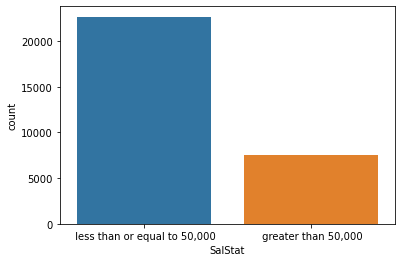

In [23]:
SalStat = sns.countplot(x = 'SalStat', data = data2)

75% of people's salary status is <= 50000

###### Histogram of Age

<AxesSubplot:xlabel='age', ylabel='Count'>

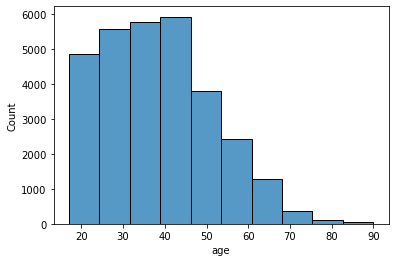

In [29]:
sns.histplot(x = "age", data = data2, kde = False, bins = 10)

People with age 20 - 45 yrs are high in frequency

In [20]:
data2["age"].describe()

count    31978.000000
mean        38.579023
std         13.662085
min         17.000000
25%         28.000000
50%         37.000000
75%         48.000000
max         90.000000
Name: age, dtype: float64

In [26]:
print(data2.groupby('gender')['age'].median())
print("\n")
print(data2.groupby('gender')['age'].mean())

gender
 Female    35
 Male      38
Name: age, dtype: int64


gender
 Female    36.852564
 Male      39.436032
Name: age, dtype: float64


###### Box plot - Age vs Salary Status
to check how age affects the salary status (Bivariate analysis)

SalStat
 greater than 50,000             43
 less than or equal to 50,000    34
Name: age, dtype: int64

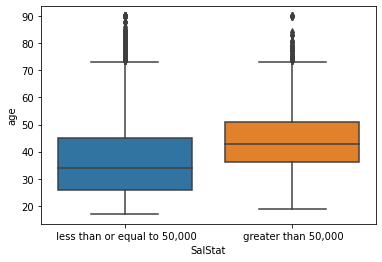

In [35]:
sns.boxplot(x = "SalStat", y = 'age', data = data2)
data2.groupby('SalStat')['age'].median()

People with 35 - 50 age are more likely to earn > 50k

people with 25 - 40 age are more likely to earn <= 50k

#### dataframe.groupby(column label)['col. label of the parameter to be grouped by'].mean()/median/mode

group the column label by the by their mean/median/modal value of the parameter specified

In [34]:
data2.groupby('SalStat')['age'].median()

SalStat
 greater than 50,000             43
 less than or equal to 50,000    34
Name: age, dtype: int64

# EXPLORATORY DATA ANALYSIS

#### 1. Jobtype vs Salary status

<AxesSubplot:xlabel='JobType', ylabel='count'>

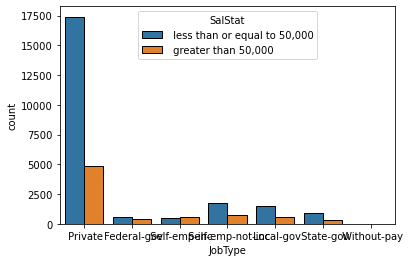

In [38]:
sns.countplot(data = data2,
             x = 'JobType',
             hue = 'SalStat',
             edgecolor = 'black')

## jobtype along the X axis can get confusing with the names... so the jobtype is taken on Y axis below

SalStat,"greater than 50,000","less than or equal to 50,000"
JobType,,
Federal-gov,0.387063,0.612937
Local-gov,0.294630,0.705370
Private,0.218792,0.781208
Self-emp-inc,0.558659,0.441341
Self-emp-not-inc,0.285714,0.714286
State-gov,0.268960,0.731040
Without-pay,0.000000,1.000000
All,0.248922,0.751078


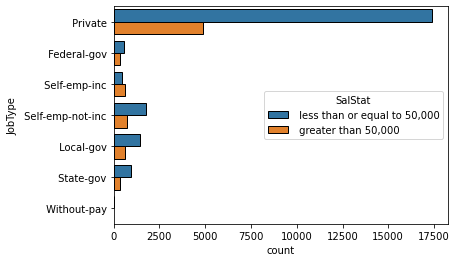

In [46]:
sns.countplot(data = data2,
             y = 'JobType',
             hue = 'SalStat',
             edgecolor = 'black')
pd.crosstab(index = data2['JobType'],
            columns = data2['SalStat'],
            dropna = True,
            margins = True,
            normalize = 'index')

#### 2. Education type vs salary status

SalStat,"greater than 50,000","less than or equal to 50,000"
EdType,,
10th,0.071951,0.928049
11th,0.056298,0.943702
12th,0.076923,0.923077
1st-4th,0.039735,0.960265
5th-6th,0.041667,0.958333
7th-8th,0.062837,0.937163
9th,0.054945,0.945055
Assoc-acdm,0.253968,0.746032
Assoc-voc,0.263198,0.736802


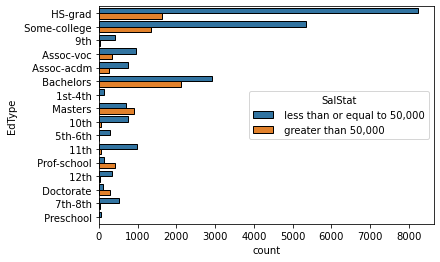

In [52]:
sns.countplot(data = data2,
             y = 'EdType',
             hue = 'SalStat',
             edgecolor = 'black')
pd.crosstab(index = data2['EdType'],
            columns = data2['SalStat'],
            dropna = True,
            margins = True,
            normalize = 'index')

Relation: higher the education type... more are the chances of having a salary > 50k

hence it is a factor affecting the salary status

people who have done Doctorate, Masters, Prof School... are more likely to earn > 50k...

this can be an impt factor to avoid misue of subsidies

#### 3. Occupation Vs  salary status

SalStat,"greater than 50,000","less than or equal to 50,000"
occupation,,
Adm-clerical,0.133835,0.866165
Armed-Forces,0.111111,0.888889
Craft-repair,0.225310,0.774690
Exec-managerial,0.485220,0.514780
Farming-fishing,0.116279,0.883721
Handlers-cleaners,0.061481,0.938519
Machine-op-inspct,0.124619,0.875381
Other-service,0.041096,0.958904
Priv-house-serv,0.006993,0.993007


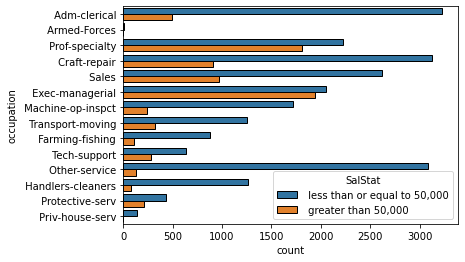

In [53]:
sns.countplot(data = data2,
             y = 'occupation',
             hue = 'SalStat',
             edgecolor = 'black')
pd.crosstab(index = data2['occupation'],
            columns = data2['SalStat'],
            dropna = True,
            margins = True,
            normalize = 'index')

Relation: for each different occupation type, the salary status is different

so, salary status depends on the occupaton.... 

those who earn > 50k... are more likely to work in Exec manegerial or Prof. speciality positions

so this can be a impt factor to avoid misuse of subsidies


#### 4. Capital Gain

<AxesSubplot:xlabel='capitalgain', ylabel='Count'>

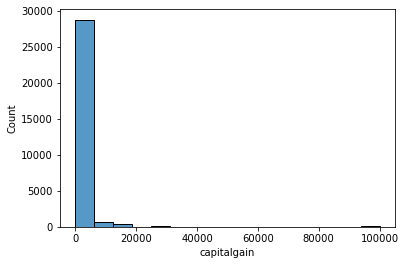

In [66]:
sns.histplot(data = data2,
             x = 'capitalgain')

92% of people (27611) have a capital gain of 0

only 8% people have received a capital gain

#### 5. Capital Loss

<AxesSubplot:xlabel='capitalloss', ylabel='Count'>

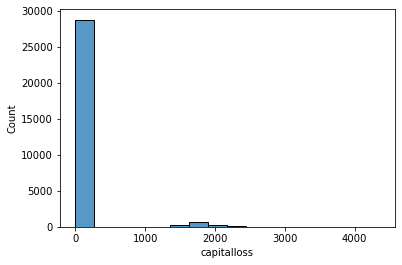

In [65]:
sns.histplot(data = data2,
             x = 'capitalloss')

95% people have a capital loss of 0

only 5% people have incurred a capital loss

#### 6. Hours worked / week vs salary status

<AxesSubplot:xlabel='SalStat', ylabel='hoursperweek'>

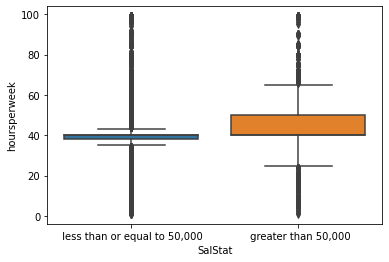

In [67]:
sns.boxplot(x = "SalStat", y = 'hoursperweek', data = data2)

Relation: those who work 40 to 50 hrs per week are more likely to earn> 50k

thus, this variable plays an impt role in the salary status of the individual

so, this can be an impt factor to avoid misuse of subsidies

SalStat,"greater than 50,000","less than or equal to 50,000"
nativecountry,,
Cambodia,0.388889,0.611111
Canada,0.336449,0.663551
China,0.294118,0.705882
Columbia,0.035714,0.964286
Cuba,0.271739,0.728261
Dominican-Republic,0.029851,0.970149
Ecuador,0.148148,0.851852
El-Salvador,0.090000,0.910000
England,0.348837,0.651163


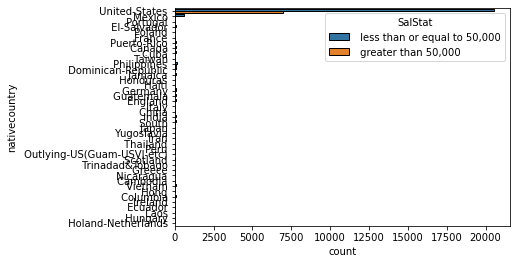

In [69]:
sns.countplot(data = data2,
             y = 'nativecountry',
             hue = 'SalStat',
             edgecolor = 'black')
pd.crosstab(index = data2['nativecountry'],
            columns = data2['SalStat'],
            dropna = True,
            margins = True,
            normalize = 'index')